<a href="https://colab.research.google.com/github/Sizwe100/Python-Random-Forest/blob/main/DECOMPOSITION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


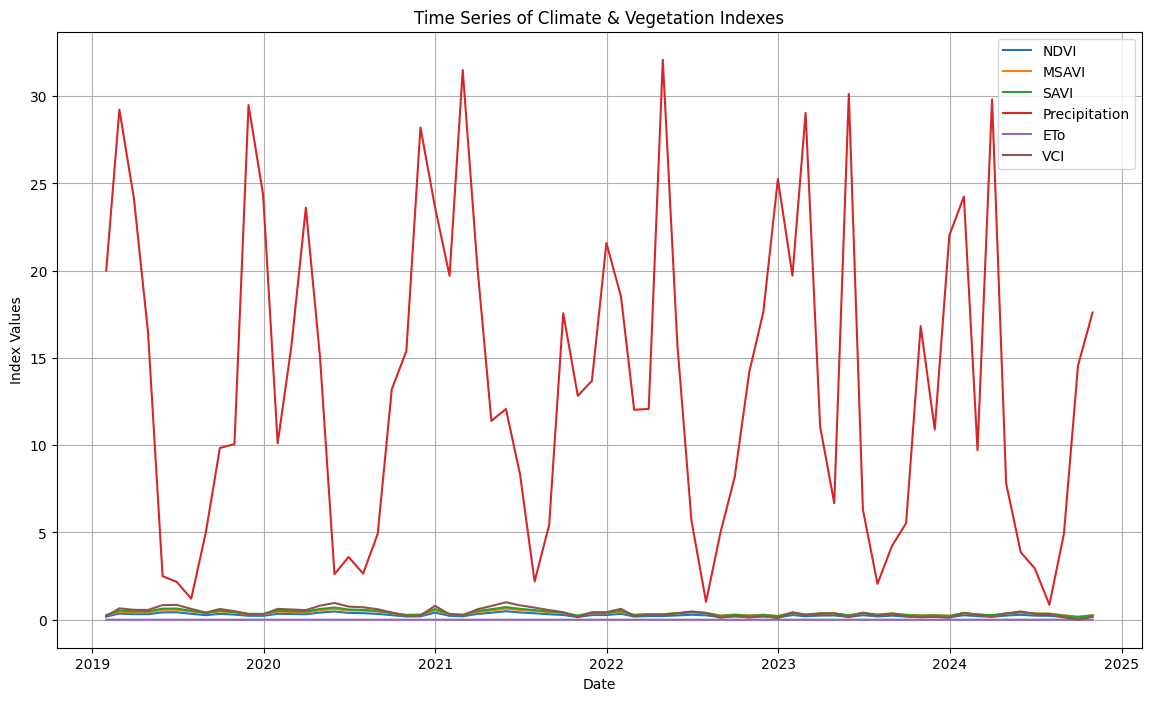

<Figure size 1200x800 with 0 Axes>

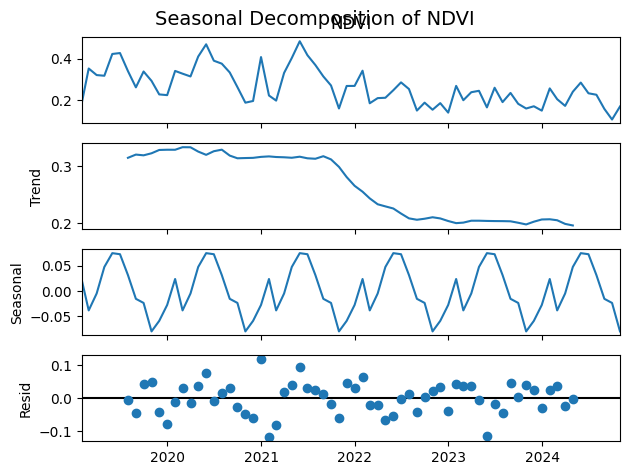

<Figure size 1200x800 with 0 Axes>

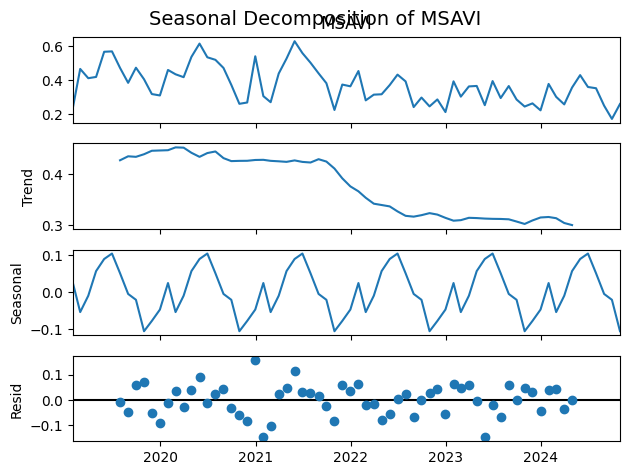

<Figure size 1200x800 with 0 Axes>

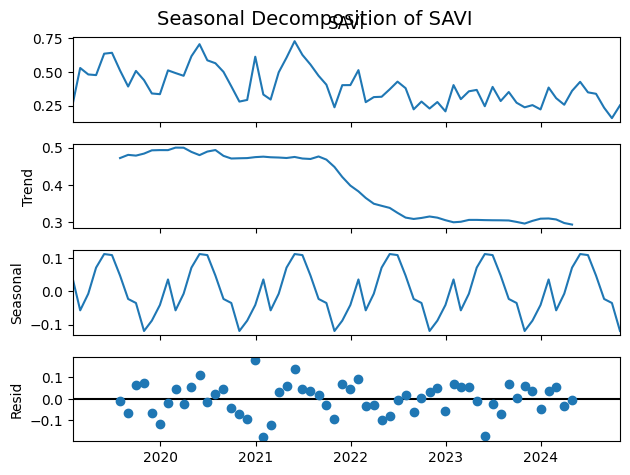

<Figure size 1200x800 with 0 Axes>

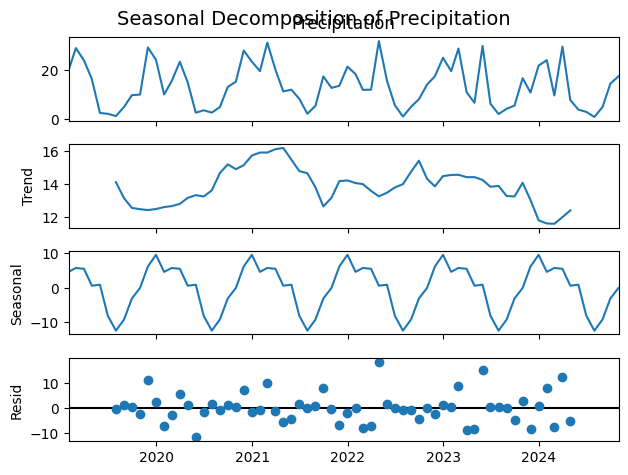

<Figure size 1200x800 with 0 Axes>

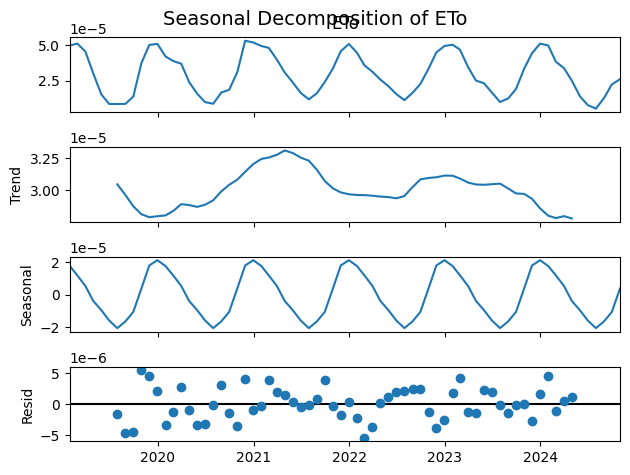

<Figure size 1200x800 with 0 Axes>

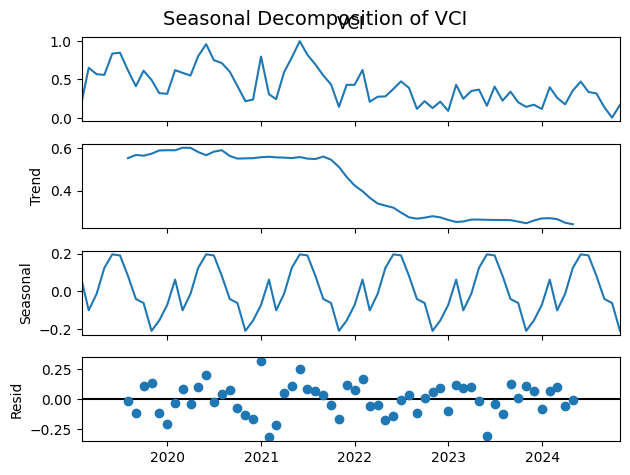

In [ ]:
# ✅ Mount Google Drive
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Mount drive (run only in Google Colab)
drive.mount('/content/drive')

# ✅ Define file path inside Google Drive
folder_path = "/content/drive/My Drive/Khandisa_Results/"
file_name = "Cleaned_Monthly_Climate_Vegetation_Indexes.csv"
file_path = folder_path + file_name

# ✅ Load the dataset
df = pd.read_csv(file_path)

# ✅ Convert 'date' to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# ✅ Plot all indexes over time
plt.figure(figsize=(14, 8))
for column in df.columns:
    plt.plot(df.index, df[column], label=column)
plt.legend()
plt.title("Time Series of Climate & Vegetation Indexes")
plt.xlabel("Date")
plt.ylabel("Index Values")
plt.grid(True)
plt.show()

# ✅ Perform Seasonal Decomposition for each index
for column in df.columns:
    plt.figure(figsize=(12, 8))
    decomposition = seasonal_decompose(df[column], model='additive', period=12)  # Monthly data, so period=12
    decomposition.plot()
    plt.suptitle(f"Seasonal Decomposition of {column}", fontsize=14)
    plt.show()


✅ All plots saved to: /content/drive/My Drive/Khandisa_Results/NDVI_Plots


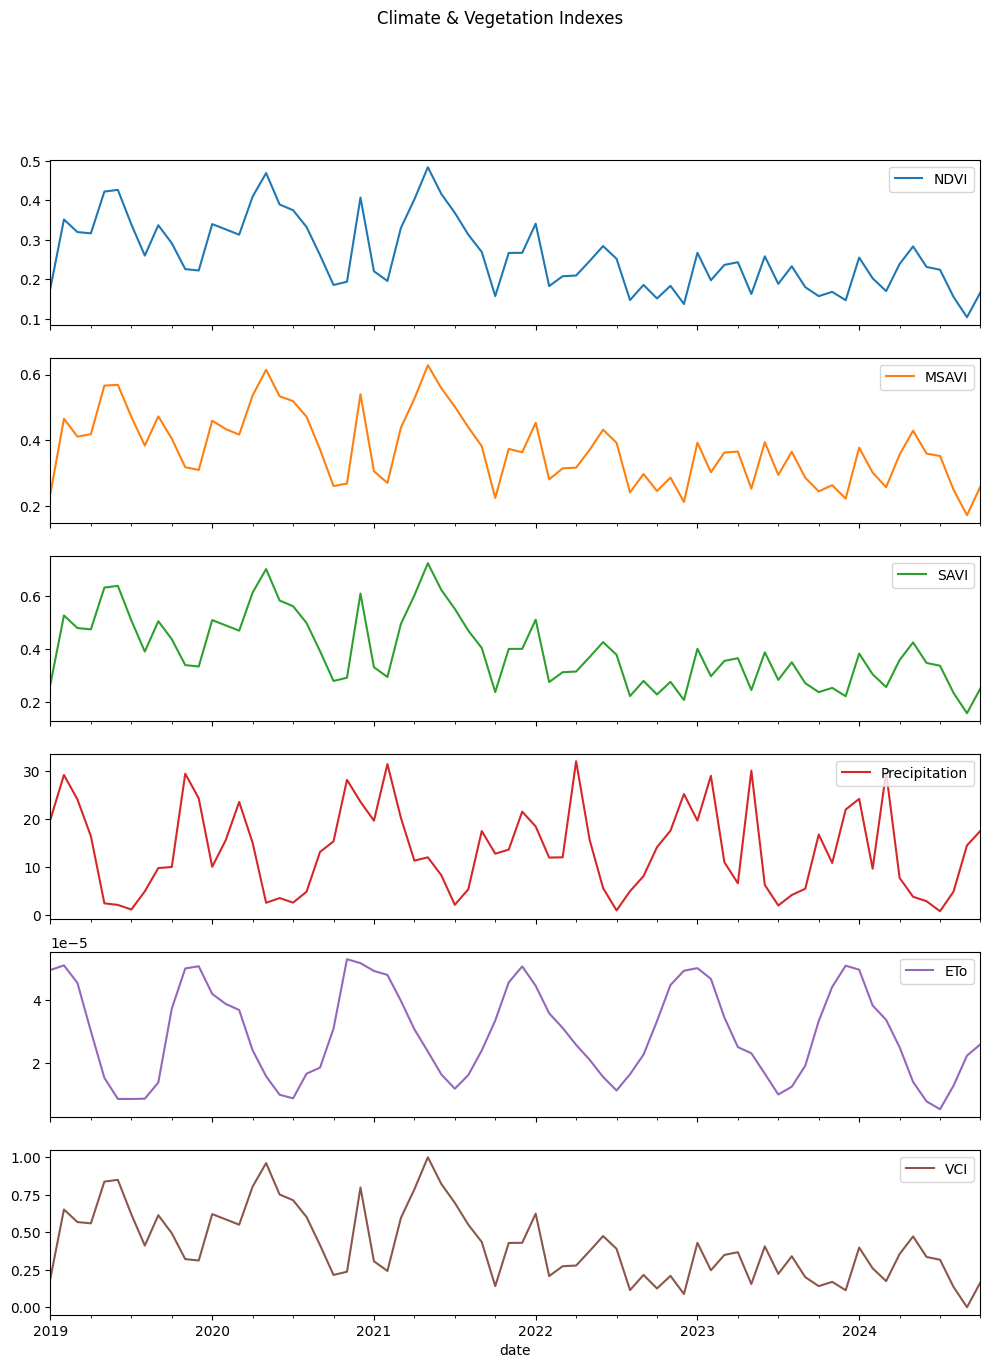

In [ ]:
# ✅ Plot & save all indexes in one figure
df.plot(subplots=True, figsize=(12, 15), title="Climate & Vegetation Indexes")
plt.savefig(os.path.join(plot_folder, "Time_Series_Plots.png"), dpi=300)

# ✅ Seasonal decomposition & save plots
for col in df.columns:
    decomposition = seasonal_decompose(df[col], model='additive', period=12)
    fig = decomposition.plot()
    fig.set_size_inches(12, 8)
    plt.savefig(os.path.join(plot_folder, f"Decomposition_{col}.png"), dpi=300)
    plt.close(fig)

print(f"✅ All plots saved to: {plot_folder}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


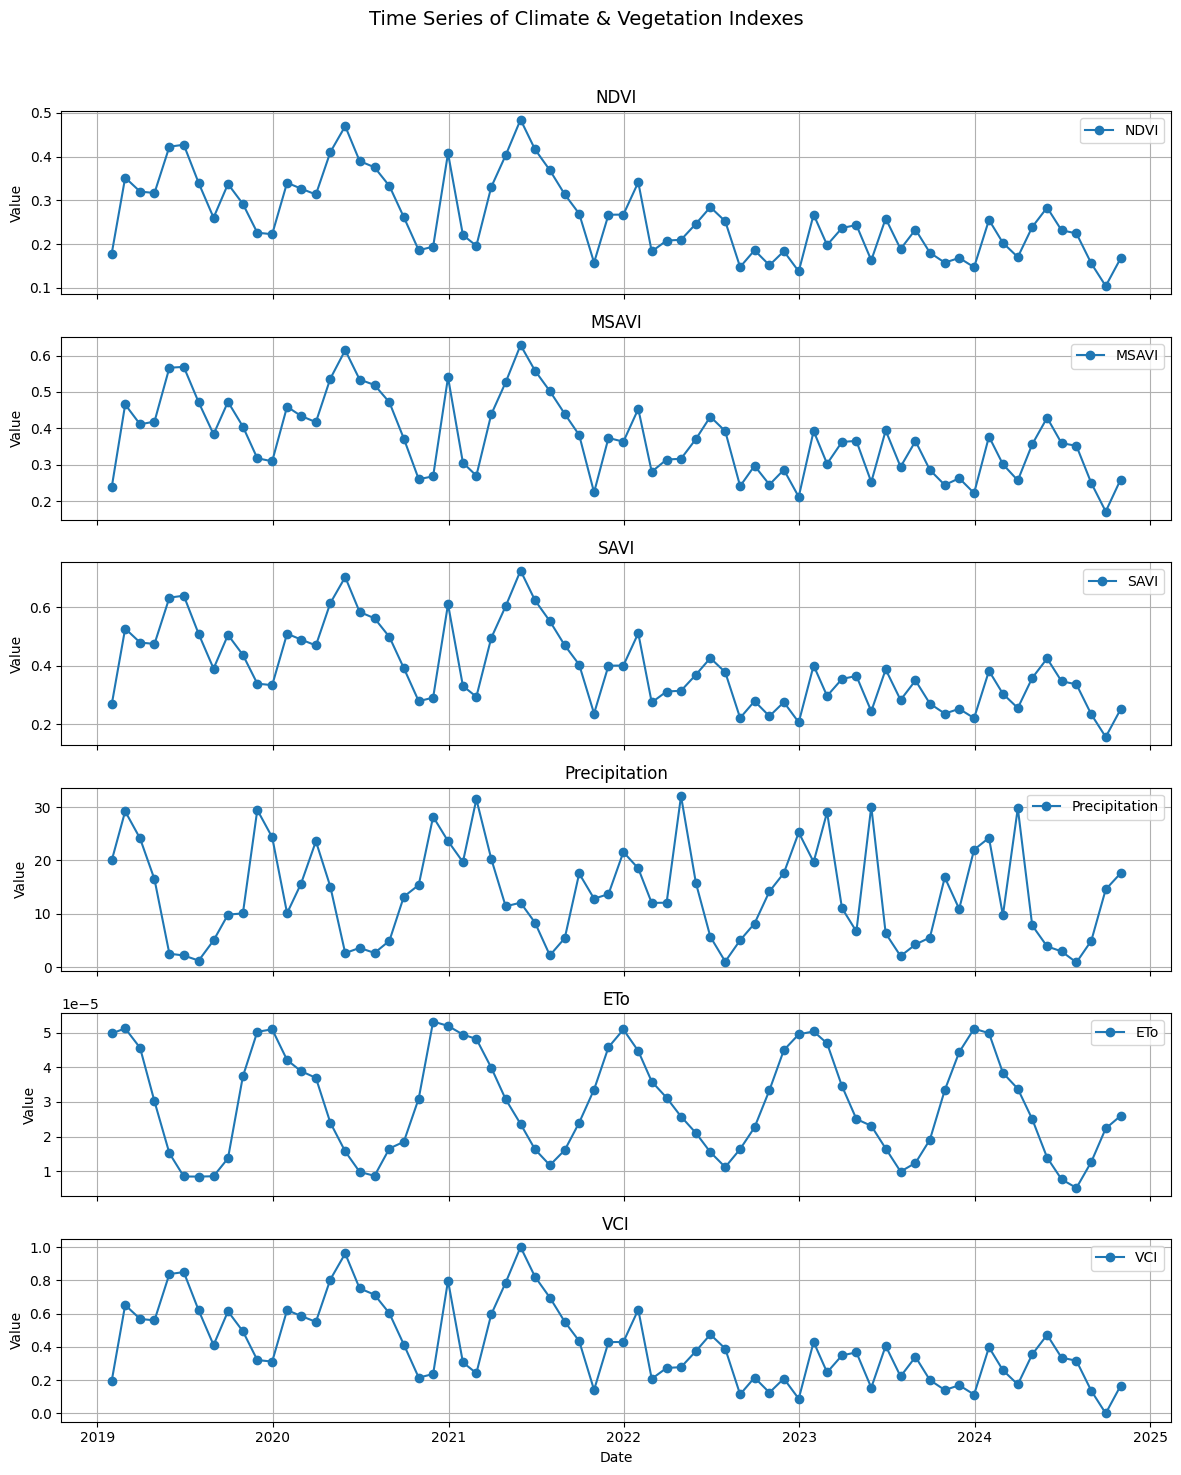

✅ Time series plots saved to: /content/drive/My Drive/Khandisa_Results/NDVI_Plots/Time_Series_Plots.png
✅ Decomposition plot saved to: /content/drive/My Drive/Khandisa_Results/NDVI_Plots/Decomposition_NDVI.png
✅ Decomposition plot saved to: /content/drive/My Drive/Khandisa_Results/NDVI_Plots/Decomposition_MSAVI.png
✅ Decomposition plot saved to: /content/drive/My Drive/Khandisa_Results/NDVI_Plots/Decomposition_SAVI.png
✅ Decomposition plot saved to: /content/drive/My Drive/Khandisa_Results/NDVI_Plots/Decomposition_Precipitation.png
✅ Decomposition plot saved to: /content/drive/My Drive/Khandisa_Results/NDVI_Plots/Decomposition_ETo.png
✅ Decomposition plot saved to: /content/drive/My Drive/Khandisa_Results/NDVI_Plots/Decomposition_VCI.png


In [ ]:
# ✅ Mount Google Drive
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import os  # For handling file paths

# ✅ Mount drive (run only in Google Colab)
drive.mount('/content/drive')

# ✅ Define file path inside Google Drive
folder_path = "/content/drive/My Drive/Khandisa_Results/"
file_name = "Cleaned_Monthly_Climate_Vegetation_Indexes.csv"
file_path = folder_path + file_name

# ✅ Load the dataset
df = pd.read_csv(file_path)

# ✅ Convert 'date' to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# ✅ Create a directory to save plots
plot_folder = os.path.join(folder_path, "NDVI_Plots")
os.makedirs(plot_folder, exist_ok=True)

# ✅ Plot all indexes separately & save
fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(12, 15), sharex=True)

for i, column in enumerate(df.columns):
    axes[i].plot(df.index, df[column], marker='o', linestyle='-', label=column)
    axes[i].set_title(column, fontsize=12)
    axes[i].set_ylabel("Value")
    axes[i].legend()
    axes[i].grid(True)

plt.xlabel("Date")
plt.suptitle("Time Series of Climate & Vegetation Indexes", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
time_series_plot_path = os.path.join(plot_folder, "Time_Series_Plots.png")
plt.savefig(time_series_plot_path, dpi=300)
plt.show()
print(f"✅ Time series plots saved to: {time_series_plot_path}")

# ✅ Perform & Save Seasonal Decomposition for each index
for column in df.columns:
    decomposition = seasonal_decompose(df[column], model='additive', period=12)  # Monthly data, so period=12
    fig = decomposition.plot()
    fig.set_size_inches(12, 8)
    plt.suptitle(f"Seasonal Decomposition of {column}", fontsize=14)

    decomposition_plot_path = os.path.join(plot_folder, f"Decomposition_{column}.png")
    plt.savefig(decomposition_plot_path, dpi=300)
    plt.close(fig)
    print(f"✅ Decomposition plot saved to: {decomposition_plot_path}")


In [8]:
import os
print(os.listdir())

['.config', 'drive', 'sample_data']


In [15]:
df = pd.read_csv('/content/drive/My Drive/Khandisa_Results/Cleaned_Monthly_Climate_Vegetation_Indexes.csv', parse_dates=['date'], index_col='date')

In [16]:
!pip install pmdarima


In [21]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['NDVI'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] > 0.05:
    print("Data is non-stationary, apply differencing")
else:
    print("Data is stationary, proceed with ARIMA")


ADF Statistic: -3.8516806238542927
p-value: 0.0024206753261475137
Data is stationary, proceed with ARIMA


In [22]:
import pmdarima as pm

model = pm.auto_arima(df['NDVI'], seasonal=False, stepwise=True, trace=True)
print(model.summary())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-155.749, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-157.365, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-159.728, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-157.749, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.68 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-161.668, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-167.310, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-159.352, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-165.392, Time=0.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-165.386, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-165.745, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-160.024, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-163.357, Time=0.22 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 4.581 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   70
Model:               SARIMAX(1, 1, 1)   Log Likelihood                  86.655
Date:                Fri, 14 Feb 2025   AIC                           -167.310
Time:                        17:13:16   BIC                           -160.607
Sample:                    01-31-2019   HQIC                          -164.651
                         - 10-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4713      0.139      3.379      0.001       0.198 

In [27]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['NDVI'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] > 0.05:
    print("Data is non-stationary, apply differencing")
else:
    print("Data is stationary, proceed with ARIMA")


ADF Statistic: -3.8516806238542927
p-value: 0.0024206753261475137
Data is stationary, proceed with ARIMA


Checking stationarity for NDVI...
ADF Statistic: -3.8516806238542927
p-value: 0.0024206753261475137
Series is stationary.
Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-155.749, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-157.365, Time=0.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-159.728, Time=1.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-157.749, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-161.668, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-167.310, Time=0.18 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-159.352, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-165.392, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-165.386, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-165.745, Time=0.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-160.024, Time=0.08 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-163.357, Time=0.20 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 4.797 seconds
Best ARIMA order for NDVI: (1, 1, 1)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
<ipython-input-30-169a6680006e>:47: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(series.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast, color='red', label="Forecast")


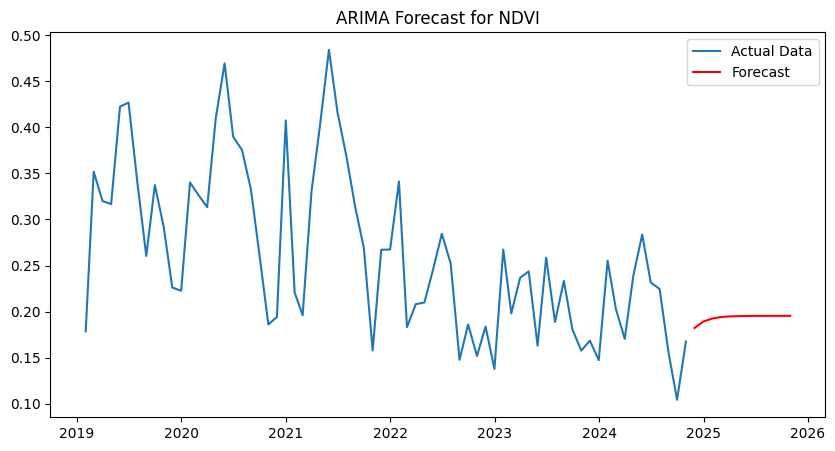

Checking stationarity for SAVI...
ADF Statistic: -3.851952969147376
p-value: 0.0024183229502667707
Series is stationary.
Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-99.814, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-101.431, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-103.794, Time=0.07 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-101.814, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-105.735, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-111.376, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-103.418, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-109.459, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-109.453, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-109.812, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-104.090, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-107.423, Time=0.17 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 2.112 seconds
Best ARIMA order for SAVI: (1, 1, 1)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
<ipython-input-30-169a6680006e>:47: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(series.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast, color='red', label="Forecast")


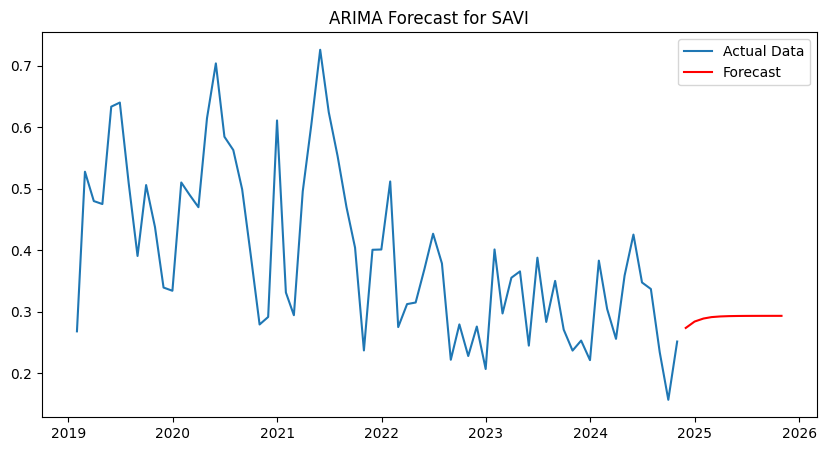

Checking stationarity for MSAVI...
ADF Statistic: -4.373216615122477
p-value: 0.00033096050914389175
Series is stationary.
Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-117.886, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-120.392, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-122.945, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-119.885, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-124.910, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-131.212, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-122.388, Time=0.05 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-129.241, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-129.236, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-129.640, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-122.763, Time=0.06 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-127.224, Time=0.17 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 2.366 seconds
Best ARIMA order for MSAVI: (1, 1, 1)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
<ipython-input-30-169a6680006e>:47: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(series.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast, color='red', label="Forecast")


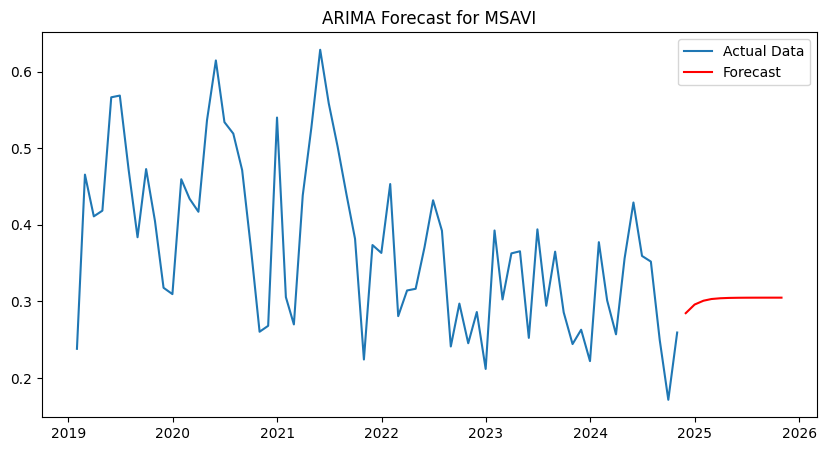

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm

# Load the data (modify file path)
df = pd.read_csv('/content/drive/My Drive/Khandisa_Results/Cleaned_Monthly_Climate_Vegetation_Indexes.csv', parse_dates=['date'], index_col='date')

# Select NDVI, SAVI, MSAVI columns (Assuming data is monthly)
ndvi_series = df['NDVI'].dropna()
savi_series = df['SAVI'].dropna()
msavi_series = df['MSAVI'].dropna()

# Function to check stationarity (Augmented Dickey-Fuller test)
def check_stationarity(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] > 0.05:
        print("Series is NOT stationary. Differencing needed.")
    else:
        print("Series is stationary.")

# Function to fit and forecast ARIMA model
def fit_arima(series, title):
    print(f"Checking stationarity for {title}...")
    check_stationarity(series)

    # Automatically determine best ARIMA order using auto_arima
    model = pm.auto_arima(series, seasonal=False, stepwise=True, trace=True)
    print(f"Best ARIMA order for {title}: {model.order}")

    # Fit the ARIMA model
    arima_model = ARIMA(series, order=model.order)
    arima_fit = arima_model.fit()

    # Forecast future values
    forecast_steps = 12  # Predict next 12 months
    forecast = arima_fit.forecast(steps=forecast_steps)

    # Plot results
    plt.figure(figsize=(10,5))
    plt.plot(series, label="Actual Data")
    plt.plot(pd.date_range(series.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast, color='red', label="Forecast")
    plt.title(f"ARIMA Forecast for {title}")
    plt.legend()
    plt.show()

    return arima_fit

# Fit ARIMA models for NDVI, SAVI, MSAVI
ndvi_model = fit_arima(ndvi_series, "NDVI")
savi_model = fit_arima(savi_series, "SAVI")
msavi_model = fit_arima(msavi_series, "MSAVI")


In [33]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [34]:
pip install --upgrade scikit-learn

In [37]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming df is your DataFrame and 'NDVI' is the column with time series data
your_data = df['NDVI']

# Manually set the best SARIMA parameters
model = SARIMAX(your_data, order=(1,1,1), seasonal_order=(1,0,0,12), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()
print(results.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:                                NDVI   No. Observations:                   70
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                  73.071
Date:                             Fri, 14 Feb 2025   AIC                           -138.142
Time:                                     17:28:55   BIC                           -130.041
Sample:                                 01-31-2019   HQIC                          -135.002
                                      - 10-31-2024                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2780      0.155      1.789      0.074      -0.027       0.583
ma.L1         -0.8544      

In [45]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define file path in Google Drive
file_path = "/content/drive/My Drive/SARIMAX_Results.csv"

# Manually create DataFrame with SARIMAX results
sarimax_results = {
    "Parameter": ["ar.L1", "ma.L1", "ar.S.L12", "sigma2"],
    "Coefficient": [0.2780, -0.8544, 0.3135, 0.0042],
    "Std Error": [0.155, 0.108, 0.128, 0.001],
    "z-score": [1.789, -7.913, 2.442, 4.444],
    "P>|z|": [0.074, 0.000, 0.015, 0.000],
    "95% CI Lower": [-0.027, -1.066, 0.062, 0.002],
    "95% CI Upper": [0.583, -0.643, 0.565, 0.006],
}

df_results = pd.DataFrame(sarimax_results)

# Save table as CSV
df_results.to_csv(file_path, index=False)

print(f"Table exported successfully to {file_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Table exported successfully to /content/drive/My Drive/SARIMAX_Results.csv


In [44]:
import matplotlib.pyplot as plt

# Generate in-sample and out-of-sample predictions
start = len(y_train)  # Start at the end of training data
end = len(y_train) + len(y_test) - 1  # Predict for the length of test data

# Get forecast
forecast = results.get_prediction(start=start, end=end, dynamic=False)
forecast_index = y_test.index  # Use the same index as test data

# Get confidence intervals
forecast_ci = forecast.conf_int()

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_train.index, y_train, label="Training Data", color="blue")
plt.plot(y_test.index, y_test, label="Actual NDVI (Test Data)", color="black")
plt.plot(forecast_index, forecast.predicted_mean, label="SARIMA Prediction", color="red", linestyle="dashed")
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color="red", alpha=0.2)

# Labels and legend
plt.xlabel("Time")
plt.ylabel("NDVI")
plt.title("SARIMA Model Predictions vs Actual NDVI")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

NameError: name 'y_train' is not defined

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

# Load the data (Ensure correct file path)
# Load the data (modify file path)
df = pd.read_csv('/content/drive/My Drive/Khandisa_Results/Cleaned_Monthly_Climate_Vegetation_Indexes.csv', parse_dates=['date'], index_col='date')
# Select the column (You can change this to 'SAVI' or 'MSAVI' as needed)
target_column = 'NDVI'  # Change to 'SAVI' or 'MSAVI' if needed
data = df[target_column]

# Check for stationarity
def check_stationarity(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] > 0.05:
        print("Data is non-stationary, differencing needed.")
    else:
        print("Data is stationary, proceed with SARIMA.")

check_stationarity(data)

# Auto SARIMA to find the best (p,d,q) and (P,D,Q,S) values
auto_model = pm.auto_arima(data, seasonal=True, m=12, stepwise=True, trace=True)
print(auto_model.summary())

# Extract best order
p, d, q = auto_model.order
P, D, Q, S = auto_model.seasonal_order

# Fit SARIMA model
sarima_model = SARIMAX(data, order=(p, d, q), seasonal_order=(P, D, Q, S, 12))
sarima_result = sarima_model.fit()

# Forecast for next 12 months
forecast_steps = 12
sarima_forecast = sarima_result.forecast(steps=forecast_steps)

# Plot actual vs forecast
plt.figure(figsize=(10, 5))
plt.plot(data, label='Actual Data', color='blue')
plt.plot(pd.date_range(data.index[-1], periods=forecast_steps+1, freq='M')[1:], sarima_forecast, label='SARIMA Forecast', color='red')
plt.legend()
plt.title(f"SARIMA Forecast for {target_column}")
plt.xlabel("Time")
plt.ylabel(target_column)
plt.show()

ADF Statistic: -3.8516806238542927
p-value: 0.0024206753261475137
Data is stationary, proceed with SARIMA.
Performing stepwise search to minimize aic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.77 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-155.749, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-157.870, Time=0.20 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-162.498, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-157.749, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-159.728, Time=0.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=-163.981, Time=0.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=-164.579, Time=0.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=-163.466, Time=0.67 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=-162.271, Time=1.11 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=-154.912, Time=0.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.74 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=-168.640, Time=0.57 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(2,0,0)[12] intercept   : AIC=inf, Time=1.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.55 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.44 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(2,0,1)[12] intercept   : AIC=inf, Time=1.22 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=-166.709, Time=0.53 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(1,0,0)[12] intercept   : AIC=inf, Time=1.33 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(1,0,0)[12] intercept   : AIC=-165.791, Time=3.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,0)[12]             : AIC=-169.228, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[12]             : AIC=-165.745, Time=0.11 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(2,0,0)[12]             : AIC=-167.645, Time=0.51 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,1)[12]             : AIC=-167.728, Time=0.38 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,1)[12]             : AIC=-168.203, Time=0.24 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(2,0,1)[12]             : AIC=-165.604, Time=0.87 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=-166.410, Time=0.13 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[12]             : AIC=-167.632, Time=0.44 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(1,0,0)[12]             : AIC=-167.545, Time=0.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[12]             : AIC=-169.599, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[12]             : AIC=-167.310, Time=0.18 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,0,0)[12]             : AIC=-167.882, Time=0.58 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[12]             : AIC=-167.919, Time=0.41 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,1)[12]             : AIC=-168.880, Time=0.27 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(2,0,1)[12]             : AIC=-165.875, Time=0.75 sec
 ARIMA(1,1,0)(1,0,0)[12]             : AIC=-159.867, Time=0.15 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,0)[12]             : AIC=-167.623, Time=0.34 sec
 ARIMA(0,1,0)(1,0,0)[12]             : AIC=-156.912, Time=0.07 sec
 ARIMA(2,1,0)(1,0,0)[12]             : AIC=-162.639, Time=0.10 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[12]             : AIC=-166.048, Time=0.59 sec

Best model:  ARIMA(1,1,1)(1,0,0)[12]          
Total fit time: 22.844 seconds
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   70
Model:             SARIMAX(1, 1, 1)x(1, 0, [], 12)   Log Likelihood                  88.800
Date:                             Fri, 14 Feb 2025   AIC                           -169.599
Time:                                     17:22:21   BIC                           -160.663
Sample:                                 01-31-2019   HQIC                          -166.054
                                      - 10-31-2024                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------

ValueError: `seasonal_order` argument must be an iterable with four elements.